The dataset used in this notebook could be found on this link:https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [1]:
from pandas import read_csv
from datetime import datetime
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame

In [2]:
# load and process data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('PRSA.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
dataset['pollution'].fillna(0, inplace=True)
dataset = dataset[24:]
print("||"*40)
print("** DATA PROCESSING COMPLETED **")
print(dataset.head(5))
print("||"*40)
dataset.to_csv('pollution.csv')

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
** DATA PROCESSING COMPLETED **
                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline 

In [4]:
dataset = pd.read_csv('pollution.csv')
dataset.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [5]:
dataset.shape 

(43800, 9)

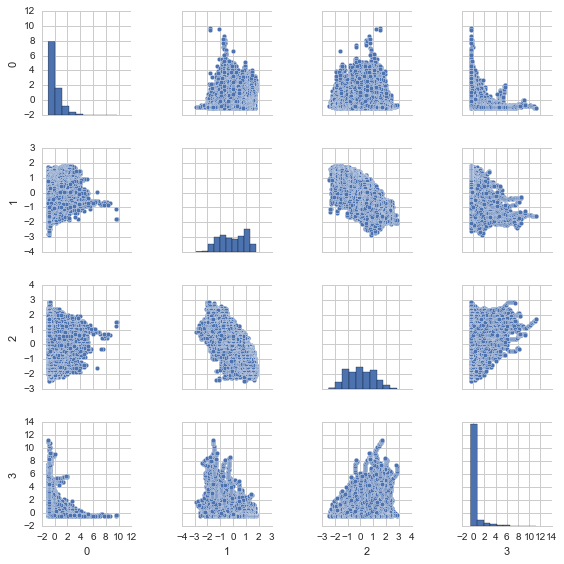

In [6]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
sns.set(style='whitegrid', context='notebook')
features_plot = ['pollution', 'dew', 'press', 'wnd_spd']

data_to_plot = dataset[features_plot]
data_to_plot = scalar.fit_transform(data_to_plot)
data_to_plot = pd.DataFrame(data_to_plot)

sns.pairplot(data_to_plot, size=2.0);
plt.tight_layout()
plt.show()

In [7]:
features = dataset

In [8]:
features = features.drop('date',axis=1)
features = features.drop('wnd_dir',axis=1)

In [9]:
labels = dataset['pollution'].values

In [10]:
features = features.values

# Train and test portions

In [11]:
from sklearn.cross_validation import train_test_split

C:\Users\Vikash\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=1)

In [13]:
print("X_train shape --> {}".format(X_train.shape))
print("X_test shape --> {}".format(X_test.shape))
print("y_train shape -->{}".format(y_train.shape))
print("y_test shape -->{}".format(y_test.shape))

X_train shape --> (30660, 7)
X_test shape --> (13140, 7)
y_train shape -->(30660,)
y_test shape -->(13140,)


# Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print("Predicted Values:",regressor.predict(X_test))

Predicted Values: [  30.   12.  183. ...,   16.   34.  175.]


In [17]:
print("R^2 score for linear regression: ",regressor.score(X_test,y_test))

R^2 score for linear regression:  1.0
